In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_folder = "real_world_data"
# Load csv files
case_file_g1 = data_folder + "/" + "case_data_g1.csv"
case_file_g2 = data_folder + "/" + "case_data_g2.csv"
population_file = data_folder + "/" + "population_data_age.csv"
vaccine_file = data_folder + "/" + "vaccine_data.csv"

# Load data from csv files into numpy arrays
case_data_g1 = np.transpose(np.loadtxt(case_file_g1, delimiter=",", skiprows=1))
case_data_g2 = np.transpose(np.loadtxt(case_file_g2, delimiter=",", skiprows=1))
population_data_age = pd.read_csv(population_file)
population_data_age['total'] = population_data_age['population-above-65'] + population_data_age['population-below-65']
total_population = np.sum(population_data_age['total'])
vaccine_data = np.loadtxt(vaccine_file, delimiter=",", skiprows=1)

R = np.array([[0.003, 0.002, 0.03], [0.015, 0.01, 0.15]]) 
gamma = 0.1 # State can only vaccinate 5% of population per week

In [3]:
# Solution Filename 
filename = "real_soln_DD_AG.jld"
baseline_name = "equity_soln_DD_AG.jld"

def load_solution(filename):
    # Load multiple arrays from the JLD2 file
    with h5py.File(filename, "r") as file:
        # Access the arrays using the names used during saving ("X", "Y", "Z" in this case)
        X = np.array(file["X_soln"])
        Y = np.array(file["Y_soln"])
        W = np.array(file["W_soln"])

    # Now you can use X, Y, and Z in Python
    X = np.transpose(X) 
    Y = np.transpose(Y)
    W = np.transpose(W)
    return X, Y, W

X, Y, W = load_solution(filename)
X_baseline, Y_baseline, W_baseline = load_solution(baseline_name)

In [24]:
nation_W = np.zeros((52,2,2))
nation_WB = np.zeros((52,2,2))

for w in range(52):
    for g in range(2):
        for d in range(2):
            nation_W[w,g,d] = np.sum(W[:,w,g,d] * np.array(population_data_age.loc[:, 'total']))
            nation_WB[w,g,d] = np.sum(W_baseline[:,w,g,d] * np.array(population_data_age.loc[:, 'total']))

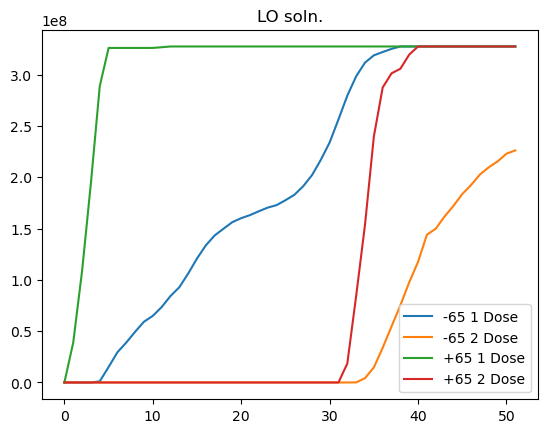

In [31]:
plt.figure()
plt.plot(np.arange(52), nation_W[:,0,0] + nation_W[:,0,1], label='-65 1 Dose')
plt.plot(np.arange(52), nation_W[:,0,1], label='-65 2 Dose')
plt.plot(np.arange(52), nation_W[:,1,0] + nation_W[:,1,1], label='+65 1 Dose')
plt.plot(np.arange(52), nation_W[:,1,1], label='+65 2 Dose')
plt.title("LO soln.")
plt.legend()
plt.show()

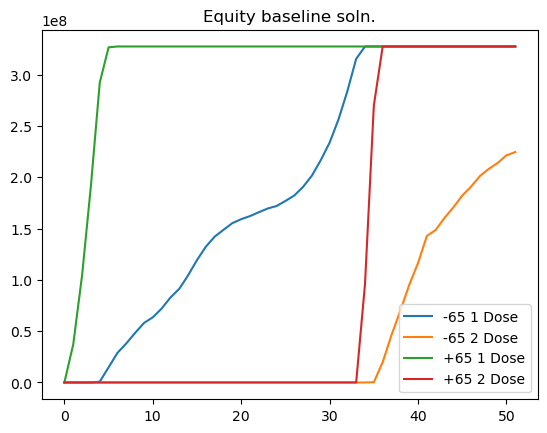

In [32]:
plt.figure()
plt.plot(np.arange(52), nation_WB[:,0,0] + nation_WB[:,0,1], label='-65 1 Dose')
plt.plot(np.arange(52), nation_WB[:,0,1], label='-65 2 Dose')
plt.plot(np.arange(52), nation_WB[:,1,0] + nation_WB[:,1,1], label='+65 1 Dose')
plt.plot(np.arange(52), nation_WB[:,1,1], label='+65 2 Dose')
plt.title("Equity baseline soln.")
plt.legend()
plt.show()

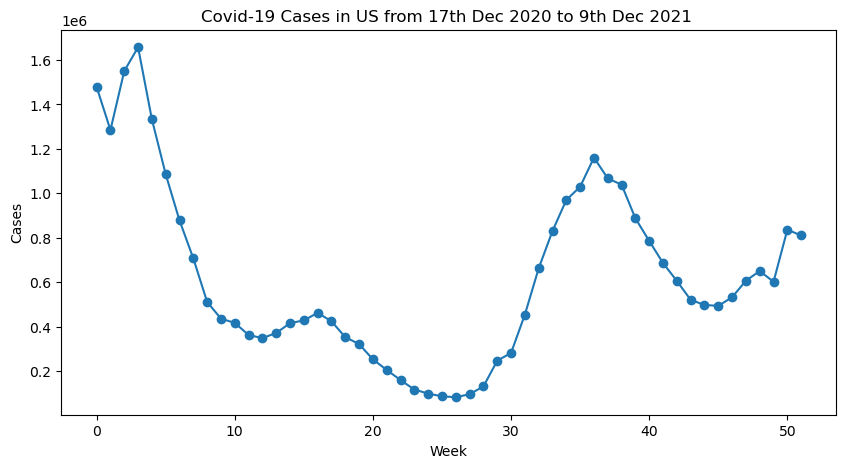

In [33]:
summed_case_data = np.sum(case_data_g1, axis=0) + np.sum(case_data_g2, axis=0) 
plt.figure(figsize=(10, 5))
plt.plot(summed_case_data, label="Data",marker='o')
plt.xlabel("Week")
plt.ylabel("Cases")
plt.title("Covid-19 Cases in US from 17th Dec 2020 to 9th Dec 2021 ") 
plt.show()


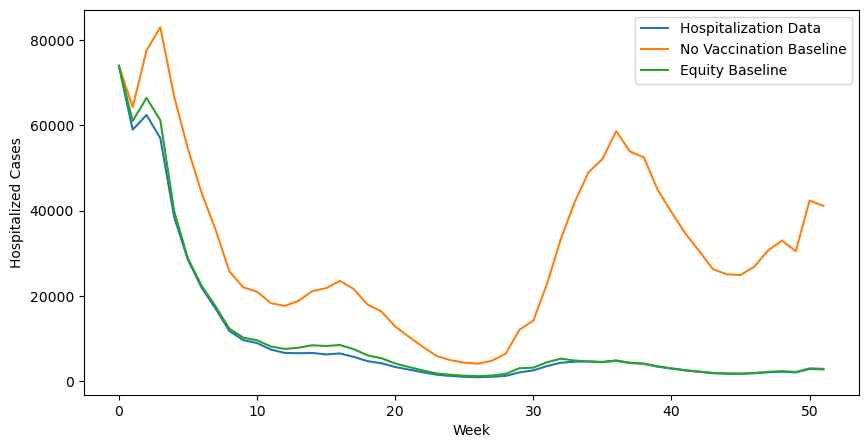

In [34]:
summed_hospitalization_data = np.sum(Y, axis=0) 
no_vaccination_baseline = R[0,2]*np.sum(case_data_g1, axis=0) + R[1,2]*np.sum(case_data_g2, axis=0) 
equity_baseline = np.sum(Y_baseline, axis=0) 

#plot the data
plt.figure(figsize=(10, 5))
plt.plot(summed_hospitalization_data, label="Hospitalization Data")
plt.plot(no_vaccination_baseline, label="No Vaccination Baseline")
plt.plot(equity_baseline, label="Equity Baseline") 
plt.xlabel("Week")
plt.ylabel("Hospitalized Cases")
plt.legend()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape

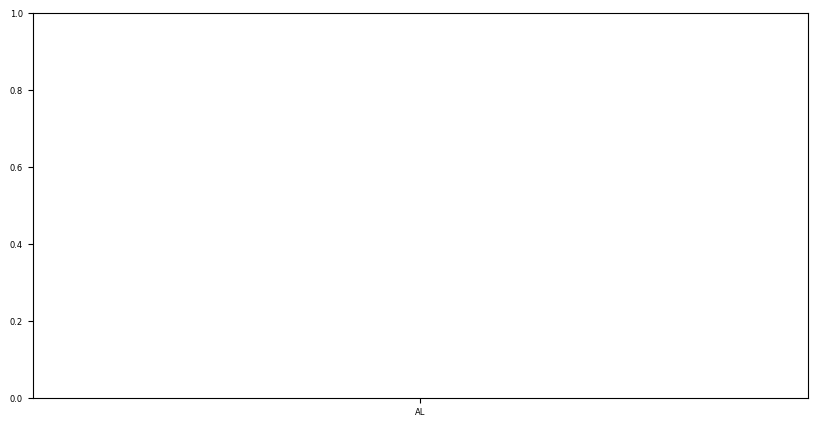

In [35]:
# Final Full vaccination rates 
final_vaccination_rates = 100*W[:,-1,1] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, final_vaccination_rates)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Final Vaccination Rates in Optimized Solution")
plt.show()

In [ ]:
# Final Full vaccination rates 
final_vaccination_rates = 100*W_baseline[:,-1,1] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, final_vaccination_rates)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Final Vaccination Rates for Equity Baseline")
plt.show()



In [ ]:
# Single Dose vaccination rates 
single_dose_rate = 100*W[:,-1,0] 
state_list = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
        ] 
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, single_dose_rate)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Full Vaccination Rates")
plt.show()

In [ ]:
# hospitalizations per state as a percentage of state population 
state_hosp = np.sum(Y, axis=1)
for i in range(len(state_hosp)):
    state_hosp[i] = 100*state_hosp[i]/population_data[i]
# plot the data in a bar chart
#reduce font size of x ticks
plt.rcParams.update({'font.size': 6})
plt.figure(figsize=(10, 5))
plt.bar(state_list, state_hosp)
plt.xlabel("State")
plt.ylabel("Percentage")
plt.title("Hospitalizations as a Percentage of State Population")
plt.show()

In [ ]:
# vaccination rate as an average across states over time
single_vaccinated_average = np.average(W[:,:,0], axis=0) * 100
double_vaccinated_average = np.average(W[:,:,1], axis=0) * 100 
baseline_single_vaccinated_average = np.average(W_baseline[:,:,0], axis=0) * 100
baseline_double_vaccinated_average = np.average(W_baseline[:,:,1], axis=0) * 100
plt.figure(figsize=(10, 5))
plt.plot(single_vaccinated_average, label="Optimized Soln - Single Dose")
plt.plot(double_vaccinated_average, label=" Optimized Soln - Double Dose")
plt.plot(baseline_single_vaccinated_average, label="Equity Baseline - Single Dose")
plt.plot(baseline_double_vaccinated_average, label="Equity Baseline - Double Dose")
plt.xlabel("Week")
plt.ylabel("Rate")
plt.title("Average State Vaccination Rate")
plt.legend()
plt.show()

In [ ]:
summed_case_data = np.sum(case_data, axis=0) 
summed_hospitalization_data = np.sum(Y, axis=0)  
# divide elementwise
ratio =100*summed_hospitalization_data / summed_case_data 
# baseline_hosp_data = np.sum(Y_baseline, axis=0) 
# ratio_baseline = 100*baseline_hosp_data / summed_case_data 
no_hosp_ratio = alpha *100
# plot the ratio 
plt.figure(figsize=(10, 5))
plt.plot(ratio, label="Our Model")
plt.plot(no_hosp_ratio*np.ones(len(ratio)), label="No Vaccination Baseline")
# plt.plot(ratio_baseline, label="Equity Baseline") 
plt.xlabel("Week")
plt.ylabel("Hospitalized Cases / Cases")
plt.title("Hospitalization Rate")
plt.legend()
plt.show()
